In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from htmresearch.support.gridcells.context_integration.context_layer import ContextLayer
from htmresearch.support.gridcells.context_integration.utils import (create_module_shape, 
                                                                     create_action_tensor, 
                                                                     get_actions, 
                                                                     get_3d_actions,
                                                                     get_closed_3d_path,
                                                                     load_digit_features)

from scipy.stats import entropy

%matplotlib inline
%load_ext autoreload
%autoreload 2



# m = 5   # Number of modules
# n = 23   # Approximate number of cells per module dimension
# d = 15   # Cells per minicolumn
# w = 10   # Code weight of the sensory SDR

FAC = 1

m = 8     # Number of modules
n = 30   # Approximate number of cells per module dimension
d = 20   # Cells per minicolumn
w = 5   # Code weight of the sensory SDR

zero = np.zeros(2*m)

# dx,dy,dz = get_actions(m,3)
dx,dy = get_actions(m,2)
dz = 2*dx + 9*dy



module_shapes = create_module_shape(m,n, rmin=-10,rmax=5)
action_tensor = create_action_tensor(m) 

X, V = get_closed_3d_path(num_samples=20, radius=5)

CL  = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200) 

F = load_digit_features(w=w, shape=CL.layer.shape)

print CL


**Context Layer:**
------------------
Number of cells:	 7380
Layer Shape:		 (20, 369)
Hyper-Module Shapes:
[[26 35]
 [29 30]
 [32 26]
 [23 34]
 [35 29]
 [33 27]
 [29 28]
 [35 27]]
Module bounds: [   0  910 1780 2612 3394 4409 5300 6112 7057]
Number of grid cells:	 7057
Activity bound:		 200
------------------


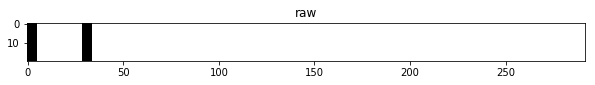

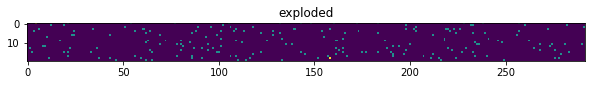

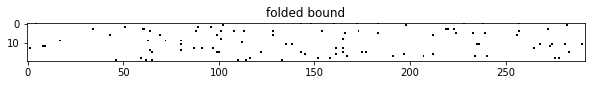

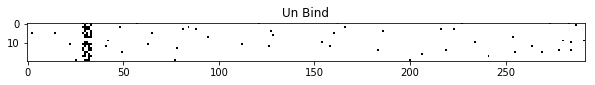

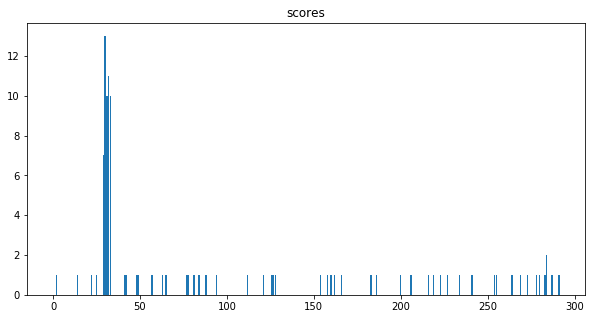

In [209]:
def top_k(score, k):
    return np.argsort(score)[::-1][:k]

vecs_data = [(1,0,1)]
vecs_child = [(-1,2,0)]

num_ex = 1
V1 = [ np.random.randint(-25,25, size=3) for _ in range(num_ex)]
V2 = [ np.random.randint(-25,25, size=3) for _ in range(num_ex)]


CL = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200)

num_members = 2
Vs = [ [ np.random.randint(-115,15, size=3) for _ in range(num_ex)] for __ in range(num_members) ]    
xs = [ F[i%10] for i in range(num_members) ]
sum_xs = []
xs_ = []


def sparsify(arr, k):
    arr_ = np.zeros(arr.shape).reshape(-1)
    sorted_args = np.argsort(arr.reshape(-1))[::-1]
    top_k = sorted_args[:k]
    arr_[top_k] = 1.
    return arr_.reshape(arr.shape)


def explode(CL, x, V):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(v1*dx + v2*dy + v3*dz, mentally=True) for v1,v2,v3 in V])
    CL.clear()
    CL.add(x_)
    return CL.layer.copy()

def reassamble(CL, x, V, k):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(-v1*dx - v2*dy - v3*dz, mentally=True) for v1,v2,v3 in V])
    x_ = sparsify(x_, k)
    CL.clear()
    CL.add(x_)
    return x_




exs        = [ explode(CL, xs[a], Vs[a]) for a in range(len(xs))]
folded_exs = sparsify( sum(exs), w*d)
xs_ = [ reassamble(CL, folded_exs, Vs[a], w*d) for a in range(len(xs))]


    
plt.figure(figsize=(10,5))
plt.title("raw")
plt.imshow(sum(xs), cmap="binary", vmin=0, vmax=1)
plt.show()

plt.figure(figsize=(10,5))
plt.title("exploded")
plt.imshow(sum(exs))
plt.show()

plt.figure(figsize=(10,5))
plt.title("folded bound")
plt.imshow(folded_exs, cmap="binary")
plt.show()


t = 1
plt.figure(figsize=(10,5))
plt.title("Un Bind")
plt.imshow(xs_[t], cmap="binary")
plt.show()

plt.figure(figsize=(10,5))
plt.title("scores")
score = np.sum(xs_[t], axis=0)
plt.bar(range(len(score)),score)
plt.show()






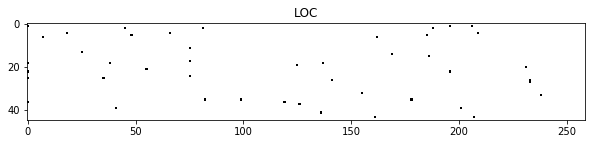

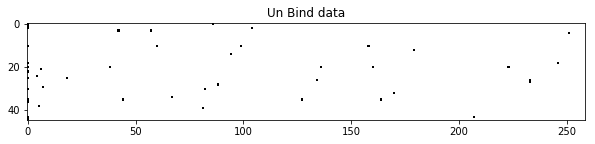

In [73]:
def top_k(score, k):
    return np.argsort(score)[::-1][:k]

vecs_data  = [(1,0,1)]
vecs_child = [(-1,2,0)]



CL = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200)

num_ex      = 1
num_members = 6
Vs     = [ 
    [np.random.randint(-15,15, size=3) for _ in range(num_ex)] 
for __ in range(num_members) ]    

xs     = [ F[i%10] for i in range(num_members) ]
sum_xs = []
xs_    = []


def sparsify(arr, k):
    arr_ = np.zeros(arr.shape).reshape(-1)
    sorted_args = np.argsort(arr.reshape(-1))[::-1]
    top_k = sorted_args[:k]
    arr_[top_k] = 1.
    return arr_.reshape(arr.shape)

def explode(CL, x, V):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(v1*dx + v2*dy + v3*dz, mentally=True) for v1,v2,v3 in V])
    CL.clear()
    CL.add(x_)
    return CL.layer.copy()

def reassamble(CL, x, V, k):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(-v1*dx - v2*dy - v3*dz, mentally=True) for v1,v2,v3 in V])
#     x_ = sparsify(x_, k)
    CL.clear()
    CL.add(x_)
    return x_

def bundle(CL, xs, Vs, k):
    exs        = [ explode(CL, xs[a], Vs[a]) for a in range(len(xs))]
    folded_exs = sparsify( sum(exs), k)
    return folded_exs




depth = 2
data  = F[0]
loc   = F[9]

for i in range(depth):
    loc = bundle(CL, [data, loc], Vs[:2], w*d)

for _ in range(depth-1):
    loc = reassamble(CL, loc, Vs[1], w*d)
    
plt.figure(figsize=(10,5))
plt.title("LOC")
plt.imshow( loc, cmap="binary")
plt.show()
    
plt.figure(figsize=(10,5))
plt.title("Un Bind data")
plt.imshow(reassamble(CL, loc, Vs[0], w*d), cmap="binary")
plt.show()






**Context Layer:**
------------------
Number of cells:	 9150
Layer Shape:		 (50, 183)
Hyper-Module Shapes:
[[25 35]
 [30 28]
 [33 40]
 [24 27]
 [39 39]
 [35 22]
 [20 34]
 [40 33]]
Module bounds: [   0  875 1715 3035 3683 5204 5974 6654 7974]
Number of grid cells:	 7974
Activity bound:		 200
------------------
Overlap of SDR and Reconsruction ...0 of 1 ...0.0
6.0 5.0


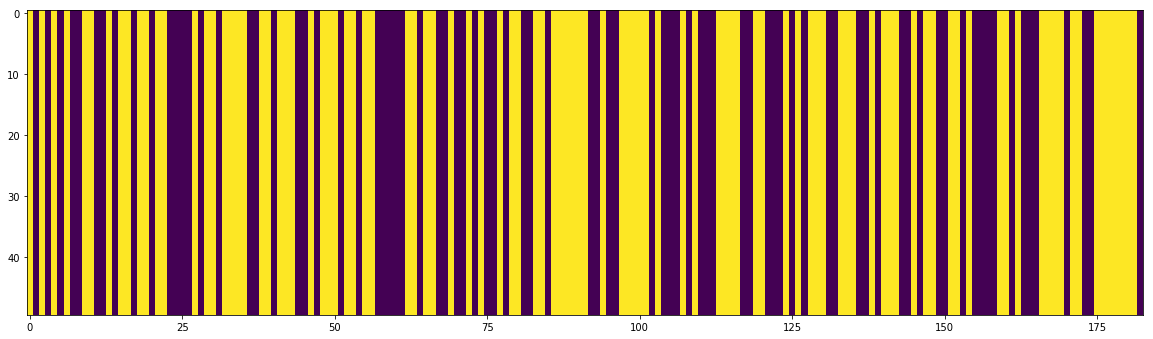

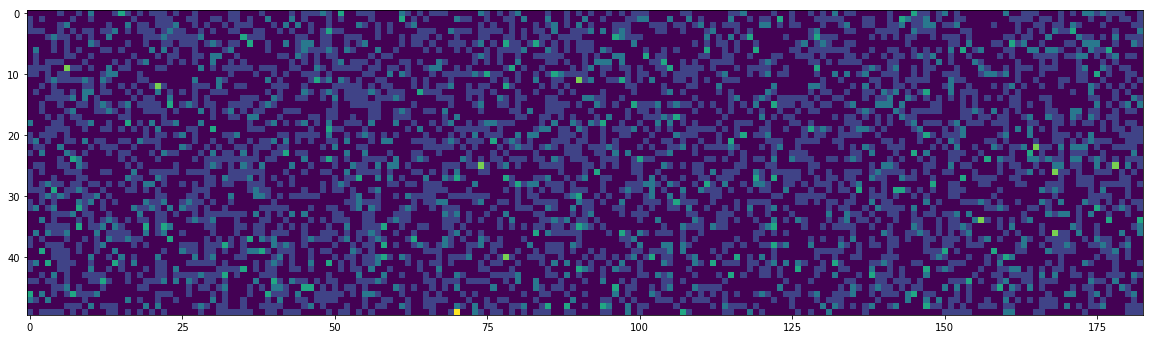

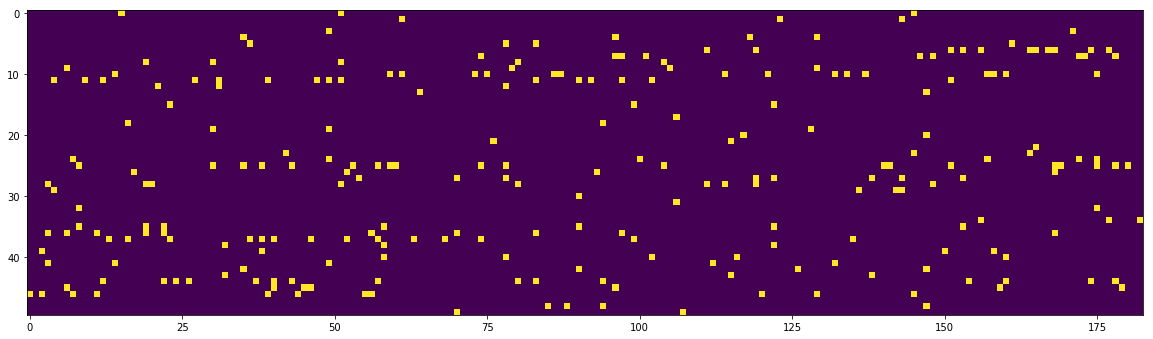

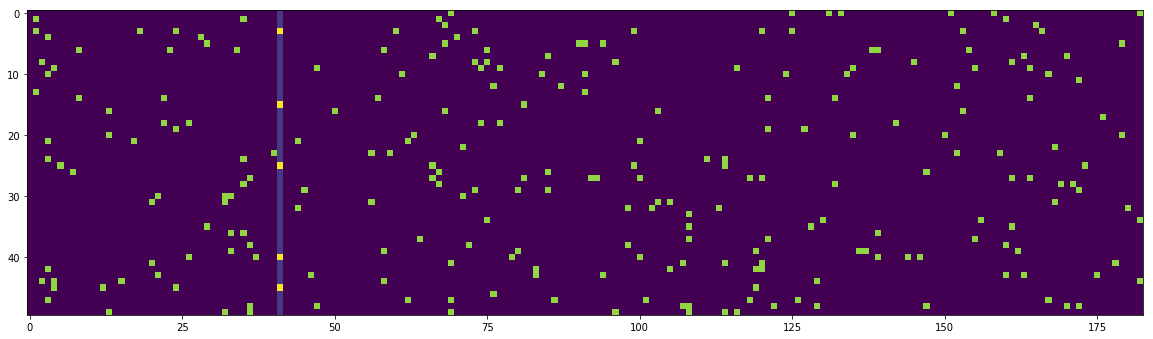

In [200]:
m = 8    # Number of modules
n = 30   # Approximate number of cells per module dimension
d = 50   # Cells per minicolumn
w = 1    # Code weight of the sensory SDR

zero = np.zeros(2*m)



dx,dy,dz = get_actions(m,3)
dxi = [dx,dy,dz]
# dx,dy = get_actions(m,2)
# dz = 2*dx + 9*dy

module_shapes = create_module_shape(m, n, rmin=-10, rmax=10)
action_tensor = create_action_tensor(m) 



CL  = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200) 



F = load_digit_features(w=w, shape=CL.layer.shape)

num_ex      = 1
num_members = 100

Vs = [ 
    [np.random.randint(-100,100, size=3) for _ in range(num_ex)] 
for __ in range(num_members) ]    



X = np.zeros((num_members, CL.layer_shape[0], CL.layer_shape[1]))
X_ = np.zeros((num_members, CL.layer_shape[0], CL.layer_shape[1]))

x = CL.layer
A = np.zeros((100, CL.layer_shape[0], CL.layer_shape[1]))


ff = np.random.choice(CL.layer_shape[1], size=(num_members, 1), replace=False)
for t in range(num_members):

    X[t,:,ff[t]] = 1.0
#     ff = np.random.choice(CL.layer_shape[1], size=w, replace=False)
#     X[t,:,ff] = 1.0
    CL.clear()
    CL.add(X[t])
    CL.explore(sum([ v1*dx + v2*dy + v3*dz  for v1,v2,v3 in Vs[t]]) )
    X_[t] = CL.layer
#     A[t] = CL.get_random_anchor()

    
    
x  = np.sum(X, axis=0)
x_  = np.sum(X_, axis=0)
x__ = sparsify(x_, 5*w*d)
x_hat = reassamble(CL, x__, Vs[0], 2*w*d)

print CL

SDR = set(np.argsort(np.sum(X[0], axis=0))[::-1][:w])
SDR_ = set(np.argsort(np.sum(x_hat, axis=0))[::-1][:w])

print "Overlap of SDR and Reconsruction ...{} of {} ...{}".format(len(SDR & SDR_), w, len(SDR & SDR_)/float(w))
print np.amax(np.sum(x_hat, axis=0)), np.amax( np.sum( x_hat[:,ff[0]] )  )
    


plt.figure(figsize=(20,10))
plt.imshow(x)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(x_)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(x__)
plt.show()
plt.figure(figsize=(20,10))

plt.imshow(5*x_hat + X[0])
plt.show()




    
